<a href="https://colab.research.google.com/github/hirajya/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7

Text Generation using LSTM

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, LayerNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt \
    -O /tmp/snowwhite.txt

data = open('/tmp/snowwhite.txt').read()

--2025-05-27 09:13:01--  https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520 (1.5K) [text/plain]
Saving to: ‘/tmp/snowwhite.txt’

/tmp/snowwhite.txt  100%[===================>]   1.48K  --.-KB/s    in 0s      

2025-05-27 09:13:01 (21.1 MB/s) - ‘/tmp/snowwhite.txt’ saved [1520/1520]



In [46]:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Create the LSTM model

1. Build an LSTM

In [47]:
# model = Sequential()
# model.add(Embedding(total_words, 70, input_length=max_sequence_len-1))
# model.add(Bidirectional(LSTM(512, return_sequences=True)))
# model.add(Dropout(0.35))
# model.add(LSTM(256))
# model.add(Dense(128, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), ))
# model.add(Dense(total_words, activation='softmax'))
# # Pick an optimizer
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Increased embedding dimension
model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.2))) # Bidirectional LSTM with recurrent dropout
model.add(LayerNormalization()) # Add Layer Normalization
model.add(Dropout(0.3)) # Dropout after the first LSTM
model.add(Bidirectional(LSTM(128))) # Another Bidirectional LSTM
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) # Dense layer with ReLU and regularizers
model.add(Dropout(0.3)) # Another Dropout layer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) # Dense layer with ReLU and regularizers
model.add(Dropout(0.3)) # Another Dropout layer
model.add(Dense(total_words, activation='softmax')) # Output layer

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy']) # Using Adam with a specific learning rate
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [48]:
history = model.fit(predictors, label, epochs=70, verbose=1, batch_size=64)

Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.0180 - loss: 5.2072
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0537 - loss: 4.9996
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0746 - loss: 4.9147
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0473 - loss: 4.8201
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0314 - loss: 4.7928
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0439 - loss: 4.7536
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0632 - loss: 4.7043
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0853 - loss: 4.6234
Epoch 9/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0600 - loss: 4.6486
Epoch 10/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0895 - loss: 4.5628
Epoch 11/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0754 - loss: 4.5506
Epoch 12/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0806 - loss: 4.4829
E

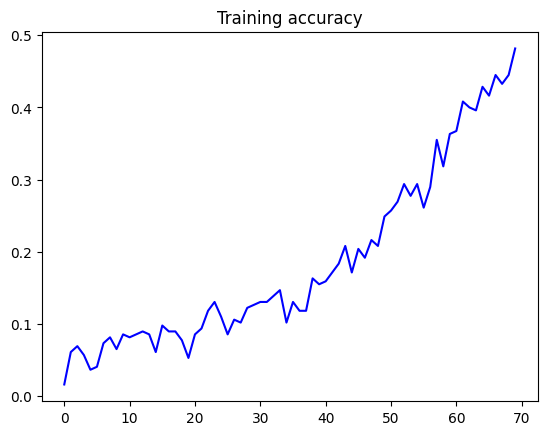

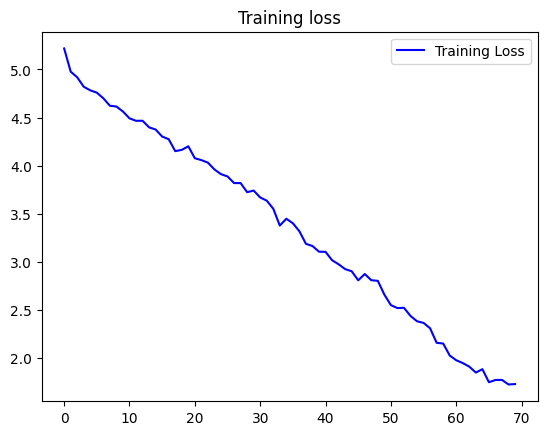

In [49]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## B. Generate texts


In [50]:
def generate_text(seed_text, next_words=40, temperature=0.5):
    output = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([output])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        preds = model.predict(token_list, verbose=0)[0]
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        predicted = np.random.choice(len(preds), p=preds)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        if output_word == "":
            break
        output += " " + output_word
    return output

2. "Snow White lived in the forest with..."

In [51]:
seed_text = "Snow White lived in the forest with"
print(generate_text(seed_text, next_words=100, temperature=10))

Snow White lived in the forest with intc agreed tree with so would to lady innocent calling once not one mirror she one contented when death loveliest return mirror night ran beautiful sure so wall this ran servant asleep is but jealous prince's was dark girl of quite every innocent excuse unseen forest asked castle thump mirror land at


3. "The queen looked into the mirror and said..."

In [52]:
seed_text = "The queen looked into the mirror and said"
print(generate_text(seed_text, next_words=100, temperature=8))

The queen looked into the mirror and said rich off fell snow hair heart unseen in with furious courage wicked every they of whenever tree furious prince's daughter heard ran jealousy with off heard land get jealousy by was under pretty with attracted though far it she man's courage mirror beside mirror rustlings they she fatal too off excuse black curled a rich woman with say say reply was not ran her delicate magic your jealousy asked curled dreadful tiredness him get whenever all up away then delicate your magic began night jealousy bitterly attracted contented every off with spite


4. "One day, Snow White found a small cottage and..."

In [53]:
seed_text = "One day, Snow White found a small cottage and"
print(generate_text(seed_text, next_words=100, temperature=8))

One day, Snow White found a small cottage and long black terrible pretty majesty she say dark beautiful one asked not by take forest loveliest feel of thought beautiful you plotting he death eyes who a contented terrible mumbled wall all an an deed strange spite not deed woman sure bitterly calling bribed that until off very rich eyes woman could her up servant wicked spying told though thump whenever dreadful called began lady one with in bitterly off servants could with on snow reply heart sitting at the he under the whenever trusty led prince's grew bribed return when snow in off terrible would from she wild him


In [54]:
seed_text = "snow white ate a poisonous"
print(generate_text(seed_text, next_words=100, temperature=8))

snow white ate a poisonous attracted a courage sounds strange your asked excuse heard beside happy man's mumbled however magic could plotting so skin last failed excuse calling stepmother are jealousy he of to leaving little attracted heart put lady made day in spying greedy eyes take mirror tiredness wicked rival majesty wild daughter off with night mirror jealous overcome everyone in fatal whenever and trusty he skin bitterly an curled who man's rustlings forest magic mirror not reward called blue so quite feel wicked rich majesty reward little a servant an once dreadful wicked bitterly from too do far skin agreed greedy agreed terrible


In [58]:
seed_text = "Snow white is the"
print(generate_text(seed_text, next_words=100, temperature=10))

Snow white is the man's in deed fell white servant feel excuse it it get ran came very too from innocent failed snow and dark one with rival excuse tree by spying sounds last mumbled stepmother pretty attracted rival would plotting return majesty alone the ran excuse get blue intc her say a spying rival night in pretty reward forest castle off a snow was an from agreed would jealousy snow her greedy when magic heard leaving contented contented began night heart all courage death spite but when strange then beautiful wall in and thump in magic get though a sitting under tiredness daughter
